In [49]:
import nbsetup
import numpy as np
import pandas as pd
from simulations.daisy_world.model import POP_DEFAULT, DaisyWorld
from simulations.daisy_world.ergodic import DaisyWorldAnalysis

# Basic test run

Looking at a very simple case to make sure it's all working as expected

0.7% maximum 0.2% mean 0.1% trending 


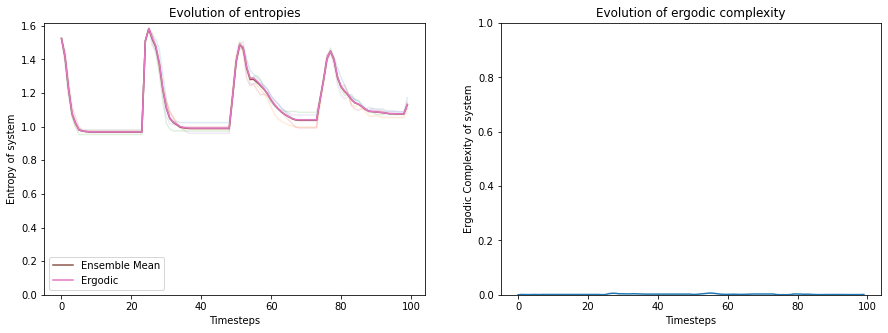

In [2]:
ensembles = 5
distance = 100
worlds = [DaisyWorld(POP_DEFAULT, store=False) for e in range(ensembles)]
analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
analysis.complete(distance)

What we immediately notice, is that for a given set of initial conditions, even with the random placement of seeds initially and the random further spreading of seeds, the complexity is basically zero. Meaning the system finds the same equilibrium state every time.

2.1% maximum 0.6% mean 0.3% trending 


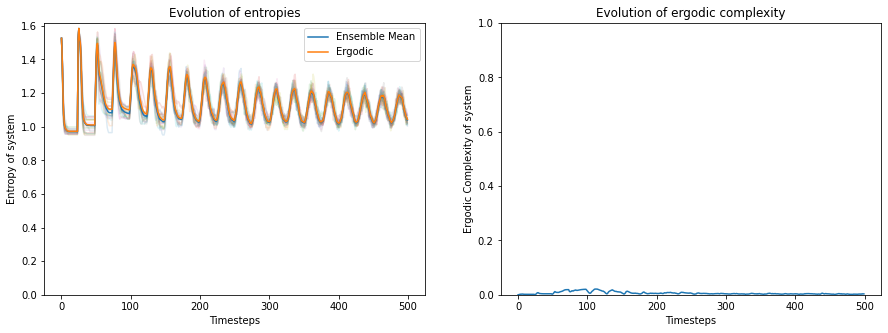

In [9]:
ensembles = 20
distance = 500
worlds = [DaisyWorld(POP_DEFAULT, store=False) for e in range(ensembles)]
analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
analysis.complete(distance)

# Adjusting initial conditions

Interestingly, adjusting the initial conditions (as in the initial population densities) between each ensemble doesn't seem to increase complexity.

10.6% maximum 1.6% mean 0.3% trending 


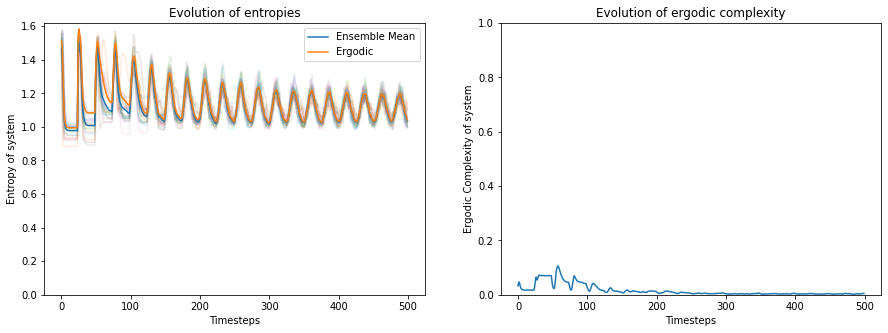

In [13]:
worlds = []
ensembles = 20
distance = 500
for w in range(ensembles):
    worlds.append(DaisyWorld({
    'white': {'albedo': 0.75, 'initial': np.random.normal(0.2, 0.05)},
    'black': {'albedo': 0.25, 'initial': np.random.normal(0.2, 0.05)},
    }, store=False))
analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
analysis.complete(distance)

Increasing the variance in initial conditions increases the complexity a little bit initially. However, what we see is the system still settles into the same equilibrium condition over time.

27.4% maximum 3.7% mean 0.4% trending 


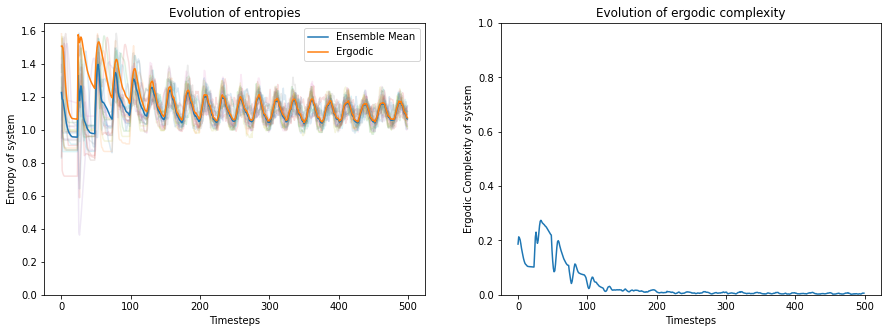

In [24]:
worlds = []
ensembles = 20
distance = 500
for w in range(ensembles):
    worlds.append(DaisyWorld({
    'white': {'albedo': 0.75, 'initial': np.random.uniform(0.01, 0.45)},
    'black': {'albedo': 0.25, 'initial': np.random.uniform(0.01, 0.45)},
    }, store=False))
analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
analysis.complete(distance)

# Luminosity

Changing luminosity seems to demonstrate different levels of 

37.5% maximum 19.9% mean 22.9% trending 


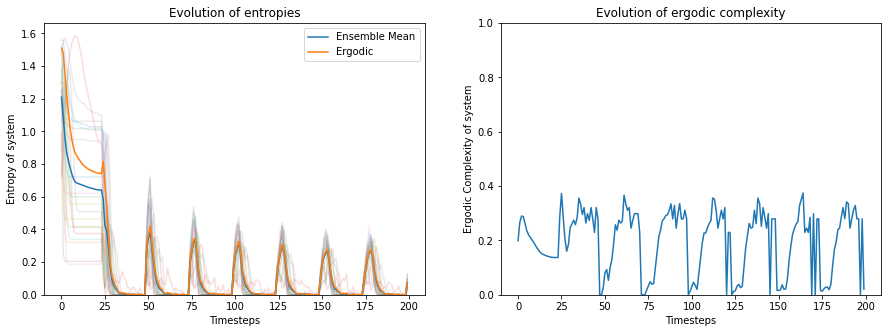

In [28]:
worlds = []
ensembles = 20
distance = 200
for w in range(ensembles):
    worlds.append(DaisyWorld({
    'white': {'albedo': 0.75, 'initial': np.random.uniform(0.01, 0.45)},
    'black': {'albedo': 0.25, 'initial': np.random.uniform(0.01, 0.45)},
    }, luminosity=0.7, store=False))
analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
analysis.complete(distance)

# Varying luminosity

In [7]:
complexities = {'mean': [], 'trend':[], 'max': []}
luminosities = np.linspace(0.2, 1, 50)
for lum in luminosities:
    worlds = []
    ensembles = 20
    distance = 100
    for w in range(ensembles):
        worlds.append(DaisyWorld({
        'white': {'albedo': 0.75, 'initial': np.random.uniform(0.05, 0.45)},
        'black': {'albedo': 0.25, 'initial': np.random.uniform(0.05, 0.45)},
        }, luminosity=lum, store=False))
    analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
    analysis.simulate(distance)
    analysis.analyse()
    complexities['mean'].append(analysis.complexity_mean)
    complexities['trend'].append(analysis.complexity_trend)
    complexities['max'].append(analysis.complexity_max)

Analysing


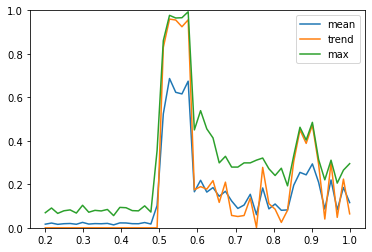

In [8]:
import seaborn as sns
for key, value in complexities.items():
    g = sns.lineplot(x=luminosities, y=value, label=key)
    g.set(ylim=(0,1))

## Second critical point

We see a first critical point between 0.5-0.6 where the system goes from always dead (both b&w dead) to sometimes one is alive.

We also find a second critical point around 0.88.

Below we look more at this point. Seeing at around 50 steps in the outcomes diverage vastly. Where some instances (with fixed initial population levels) end up with only a single population type, while most others settle into a version with both species alive and balanced.

58.7% maximum 37.6% mean 57.3% trending 


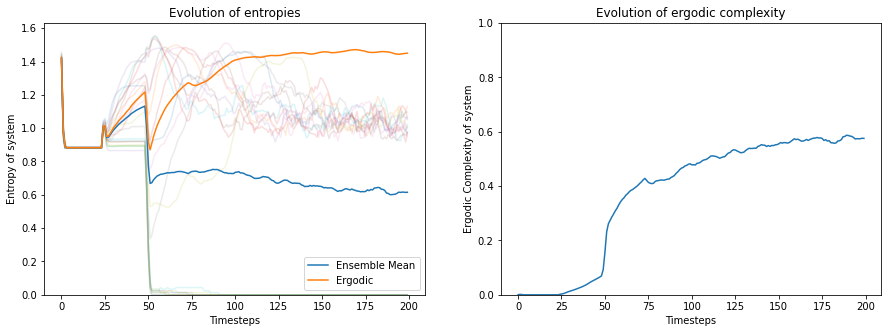

In [12]:
worlds = []
ensembles = 20
distance = 200
for w in range(ensembles):
    worlds.append(DaisyWorld({
    'white': {'albedo': 0.75, 'initial': 0.3},
    'black': {'albedo': 0.25, 'initial': 0.3},
    }, luminosity=0.88, store=False))
analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
analysis.complete(distance)

# Varying initial volumes

We see that the system around certain critical points is sensitive to the layout of the initial population. So now looking at what varying these initial populations does.

Looking at 0.2 and 0.3, we see the same overall pattern of complexity around the certain critical points. However, the size of the complexity is greater (i.e. there's a more even spread in the volume of vastly different outcomes).

Analysing


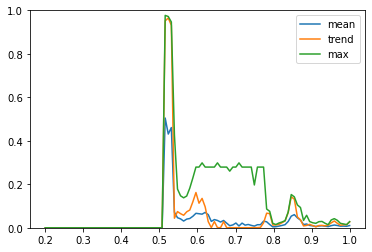

In [13]:
complexities = {'mean': [], 'trend':[], 'max': []}
luminosities = np.linspace(0.2, 1, 100)
for lum in luminosities:
    worlds = []
    ensembles = 20
    distance = 100
    for w in range(ensembles):
        worlds.append(DaisyWorld({
        'white': {'albedo': 0.75, 'initial': 0.2},
        'black': {'albedo': 0.25, 'initial': 0.2},
        }, luminosity=lum, store=False))
    analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
    analysis.simulate(distance)
    analysis.analyse()
    complexities['mean'].append(analysis.complexity_mean)
    complexities['trend'].append(analysis.complexity_trend)
    complexities['max'].append(analysis.complexity_max)
    
for key, value in complexities.items():
    g = sns.lineplot(x=luminosities, y=value, label=key)
    g.set(ylim=(0,1))

Analysing


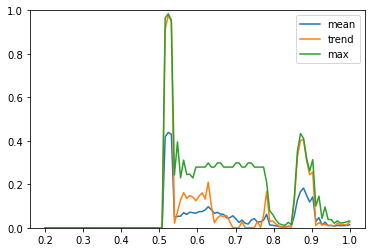

In [15]:
complexities = {'mean': [], 'trend':[], 'max': []}
luminosities = np.linspace(0.2, 1, 100)
for lum in luminosities:
    worlds = []
    ensembles = 20
    distance = 100
    for w in range(ensembles):
        worlds.append(DaisyWorld({
        'white': {'albedo': 0.75, 'initial': 0.3}, # 0.3 seems to increase complexity
        'black': {'albedo': 0.25, 'initial': 0.3},
        }, luminosity=lum, store=False))
    analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
    analysis.simulate(distance)
    analysis.analyse()
    complexities['mean'].append(analysis.complexity_mean)
    complexities['trend'].append(analysis.complexity_trend)
    complexities['max'].append(analysis.complexity_max)
    
for key, value in complexities.items():
    g = sns.lineplot(x=luminosities, y=value, label=key)
    g.set(ylim=(0,1))

# Static and dynamic species

Introducing a greater number of species does little to the ergodic complexity itself. This is partly to be expected as the system adapts based on the static set of states that it has available.

5.7% maximum 2.5% mean 1.6% trending 


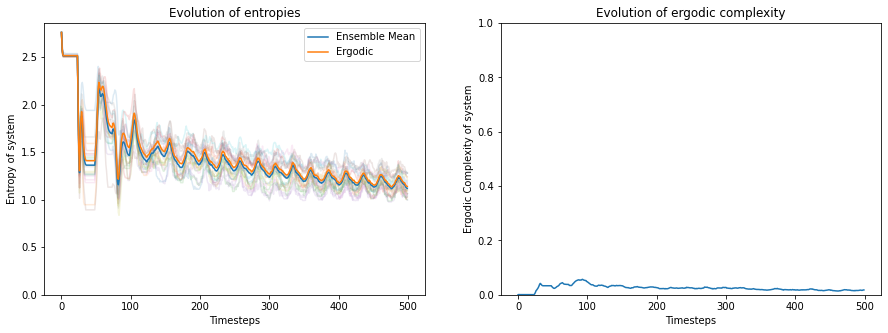

In [17]:
worlds = []
ensembles = 20
distance = 500
for w in range(ensembles):
    worlds.append(DaisyWorld({
    'white': {'albedo': 0.75, 'initial': 0.1},
    'white 2': {'albedo': 0.7, 'initial': 0.1},
    'white 3': {'albedo': 0.8, 'initial': 0.1},
    
    'black': {'albedo': 0.25, 'initial': 0.1},
    'black 2': {'albedo': 0.2, 'initial': 0.1},
    'black 3': {'albedo': 0.3, 'initial': 0.1},
    }, store=False))
analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
analysis.complete(distance)

However, if we add some variance to the albedo of each of the species, then we start seeing some complexity. This is partly to be expected as the complex system adapts to optimise itself given the inputs it has and what we're seeing here is the inputs changing.

In [20]:
def create_ecosystem(variations=3, variance=0.01):
    eco = {}
    for e in range(variations):
        eco["white %s" % e] = {'albedo': np.random.normal(0.75, variance), 'initial': 0.1}
        eco["black %s" % e] = {'albedo': np.random.normal(0.25, variance), 'initial': 0.1}
    return eco

56.1% maximum 45.5% mean 55.0% trending 


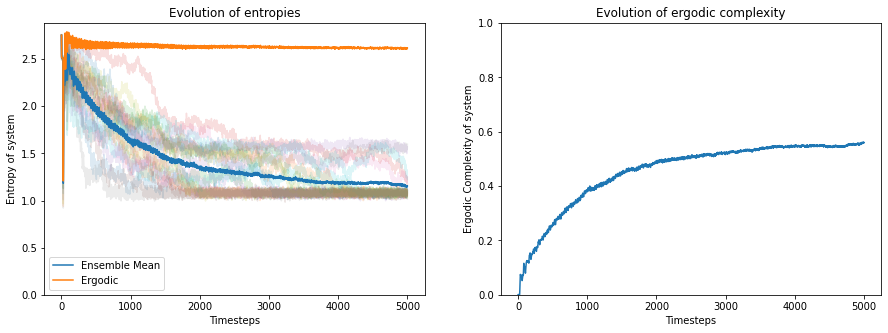

In [22]:
worlds = []
ensembles = 20
distance = 5000
for w in range(ensembles):
    worlds.append(DaisyWorld(create_ecosystem(3), store=False))
analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
analysis.complete(distance)

# More species via mutation

So to model this more accurately (in terms of how we think about the real world) rather than pre-defining a set of species, let's allow the system to randomly mutate a new set of species.

What we see here is a massive uptick in complexity.

54.2% maximum 39.0% mean 53.8% trending 


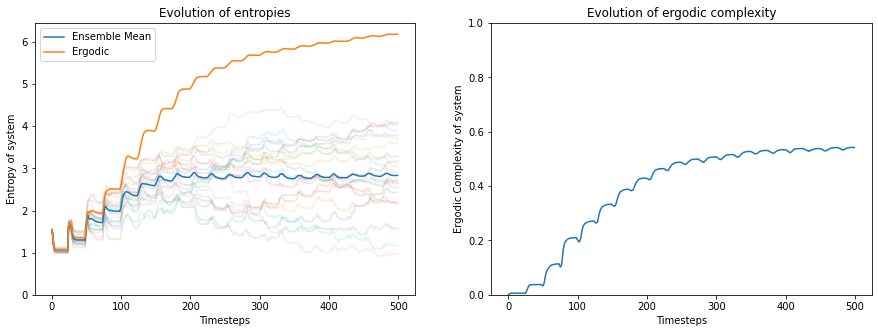

In [14]:
worlds = []
ensembles = 20
distance = 500
for w in range(ensembles):
    worlds.append(DaisyWorld(POP_DEFAULT, mutate_p=0.01, mutate_a=0.1, store=False))
analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
analysis.complete(distance)

51.4% maximum 41.2% mean 51.1% trending 


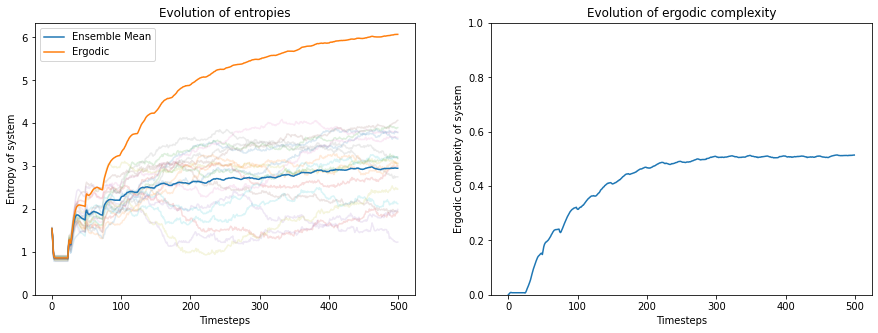

In [16]:
worlds = []
ensembles = 20
distance = 500
for w in range(ensembles):
    worlds.append(DaisyWorld(POP_DEFAULT, luminosity=0.88, mutate_p=0.01, mutate_a=0.1, store=False))
analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
analysis.complete(distance)

Analysing


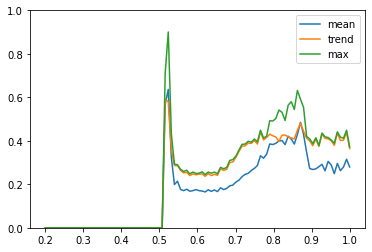

In [18]:
complexities = {'mean': [], 'trend':[], 'max': []}
luminosities = np.linspace(0.2, 1, 100)
for lum in luminosities:
    worlds = []
    ensembles = 10
    distance = 500
    for w in range(ensembles):
        worlds.append(DaisyWorld({
        'white': {'albedo': 0.75, 'initial': 0.3},
        'black': {'albedo': 0.25, 'initial': 0.3},
        }, luminosity=lum, mutate_p=0.01, store=False))
    analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
    analysis.simulate(distance)
    analysis.analyse()
    complexities['mean'].append(analysis.complexity_mean)
    complexities['trend'].append(analysis.complexity_trend)
    complexities['max'].append(analysis.complexity_max)
    
for key, value in complexities.items():
    g = sns.lineplot(x=luminosities, y=value, label=key)
    g.set(ylim=(0,1))

# Giving the system a kick

Similar to how looked at giving the system a kick with the wealth case, by introducing a whole new set of agents with wealth of 1 (dropping the overall entropy of the system). We want to see what happens here.

In this case we're going to simulate a bunch of the Daisy's being wiped out by a poison or rapid plague. First off let's baseline what happens without a kick.

Then we look at what happens with one, then a really severe one.

62.3% maximum 50.4% mean 61.2% trending 


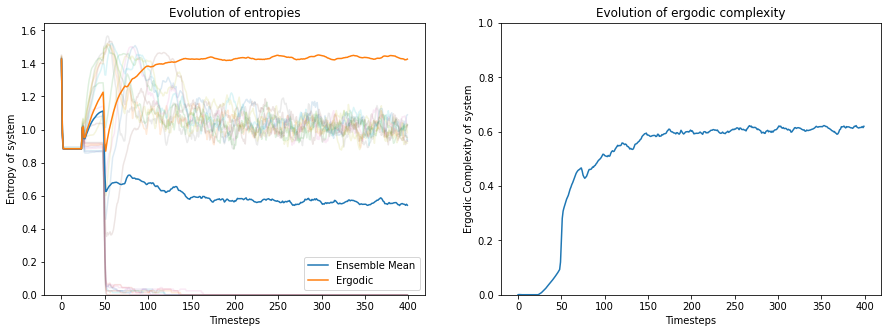

In [32]:
worlds = []
ensembles = 20
distance = 400
for w in range(ensembles):
    worlds.append(DaisyWorld({
    'white': {'albedo': 0.75, 'initial': 0.3},
    'black': {'albedo': 0.25, 'initial': 0.3},
    }, luminosity=0.88, store=False))
analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
analysis.complete(distance)

47.5% maximum 35.8% mean 43.9% trending 


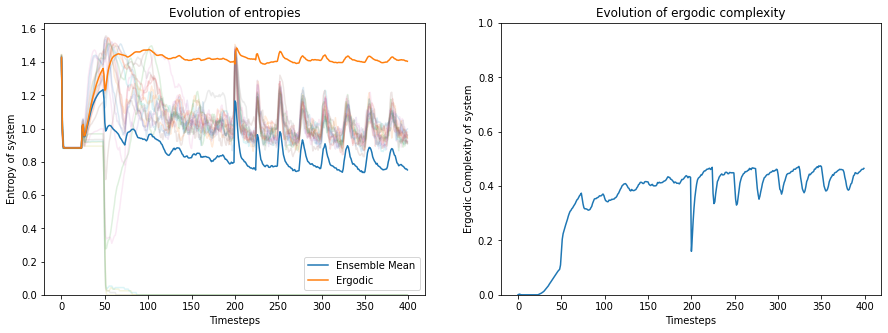

In [31]:
worlds = []
ensembles = 20
distance = 200
for w in range(ensembles):
    worlds.append(DaisyWorld({
    'white': {'albedo': 0.75, 'initial': 0.3},
    'black': {'albedo': 0.25, 'initial': 0.3},
    }, luminosity=0.88, store=False))
analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
analysis.simulate(distance)

for w in worlds:
    agents = w.schedule.agents
    num_to_die = int(len(agents)*0.5)
    to_die = np.random.choice(agents, num_to_die, replace=False)
    for a in to_die:
        a.die()

analysis.complete(distance)

65.0% maximum 49.8% mean 62.9% trending 


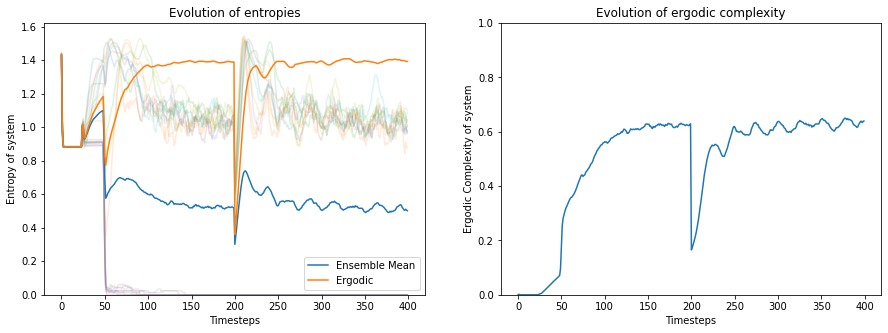

In [33]:
worlds = []
ensembles = 20
distance = 200
for w in range(ensembles):
    worlds.append(DaisyWorld({
    'white': {'albedo': 0.75, 'initial': 0.3},
    'black': {'albedo': 0.25, 'initial': 0.3},
    }, luminosity=0.88, store=False))
analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
analysis.simulate(distance)

for w in worlds:
    agents = w.schedule.agents
    num_to_die = int(len(agents)*0.9)
    to_die = np.random.choice(agents, num_to_die, replace=False)
    for a in to_die:
        a.die()

analysis.complete(distance)

We see with a small shift it resets this dynamic (oscillating) equilirbium. Then with a larger one, there's less of a dynamic shift.

Now adding a global ice age with a die-off.

# Comparing complexity as a measure vs means of macro variables



In [97]:
complexities = {'mean': [], 'trend':[], 'max': []}
counts = {'black' :[], 'white': [], 'empty': []}
temperature = []

luminosities = np.linspace(0.4, 1, 100)
ensembles = 10
distance = 200

for lum in luminosities:
    worlds = []
    for w in range(ensembles):
        worlds.append(DaisyWorld({
        'white': {'albedo': 0.75, 'initial': 0.3},
        'black': {'albedo': 0.25, 'initial': 0.3},
        }, luminosity=lum, store=False))
    analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
    analysis.simulate(distance)
    analysis.analyse()
    
    # complexity
    complexities['mean'].append(analysis.complexity_mean)
    complexities['trend'].append(analysis.complexity_trend)
    complexities['max'].append(analysis.complexity_max)
    
    # alts
    temp_temp = []
    count_temp = {'black' :[], 'white': [], 'empty': []}
    for w in worlds:
        temp_temp.append(w.temperature)
        
        for key, value in w.counts.items():
            count_temp[key].append(value)
    
    temperature.append(temp_temp)
    for key, value in counts.items():
        counts[key].append(count_temp[key])

Analysing


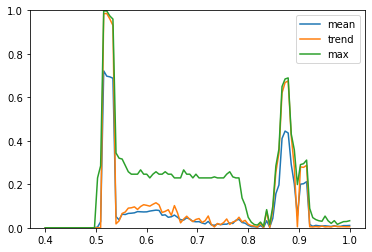

In [99]:
for key, value in complexities.items():
    g = sns.lineplot(x=luminosities, y=value, label=key)
    g.set(ylim=(0,1))

In [206]:
def df_y(data, x):
    return pd.DataFrame(data).assign(luminosity=x).melt(id_vars="luminosity")

def plot_y(values, lums, ax=None, label=None, color=None):
    sns.lineplot(data=df_y(values, lums), x='luminosity', y='value', label=label, ax=ax, color=color)

In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plot_y(temperature, luminosities, ax1, "temperature")

for key, value in counts.items():
    plot_y(value, luminosities, ax2, key)

<AxesSubplot:>

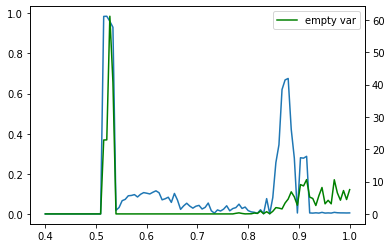

In [115]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#sns.lineplot(x=luminosities, y=np.var(counts['black'], axis=1), ax=ax2, color="red", label="black var")
#sns.lineplot(x=luminosities, y=np.var(counts['white'], axis=1), ax=ax2, color="orange", label="white var")
sns.lineplot(x=luminosities, y=np.var(temperature, axis=1), ax=ax2, color="green", label="empty var")
#sns.lineplot(x=luminosities, y=np.var(counts['empty'], axis=1), ax=ax2, color="green", label="empty var")
sns.lineplot(x=luminosities, y=complexities['trend'], ax=ax1)

### How does this look with mutation?

In [137]:
complexities = {'mean': [], 'trend':[], 'max': []}
empties = []
temperature = []

luminosities = np.linspace(0.4, 1, 50)
ensembles = 10
distance = 200
mutation_rate = 0.002

for lum in luminosities:
    worlds = []
    for w in range(ensembles):
        worlds.append(DaisyWorld({
        'white': {'albedo': 0.75, 'initial': 0.3},
        'black': {'albedo': 0.25, 'initial': 0.3},
        }, luminosity=lum, mutate_p=mutation_rate, store=False))
    analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
    analysis.simulate(distance)
    analysis.analyse()
    
    # complexity
    complexities['mean'].append(analysis.complexity_mean)
    complexities['trend'].append(analysis.complexity_trend)
    complexities['max'].append(analysis.complexity_max)
    
    # alts
    temp_temp = []
    empties_temp = []
    for w in worlds:
        temp_temp.append(w.temperature)
        empties_temp.append(w.counts['empty'])
    
    temperature.append(temp_temp)
    empties.append(empties_temp)

Analysing


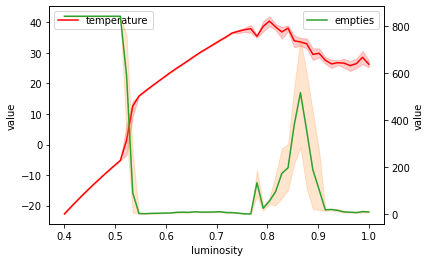

In [150]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plot_y(temperature, luminosities, ax1, "temperature", "red")
plot_y(empties, luminosities, ax2, "empties")

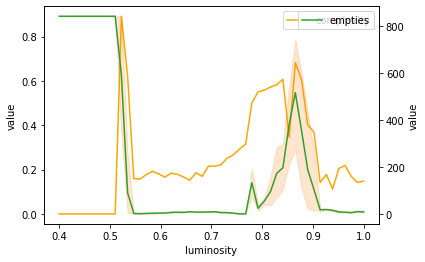

In [152]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plot_y(complexities['trend'], luminosities, ax1, "complexity", "orange")
plot_y(empties, luminosities, ax2, "empties")

<AxesSubplot:>

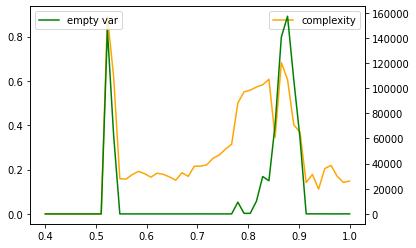

In [153]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.lineplot(x=luminosities, y=np.var(empties, axis=1), ax=ax2, color="green", label="empty var")
sns.lineplot(x=luminosities, y=complexities['trend'], ax=ax1, color="orange", label="complexity")

In [155]:
complexities = {'mean': [], 'trend':[], 'max': []}
empties = []
temperature = []
ecosystem = []
experiments = {}

luminosities = np.linspace(0.4, 1, 50)
ensembles = 10
distance = 200
mutation_rate = 0.002


for lum in luminosities:
    worlds = []
    for w in range(ensembles):
        worlds.append(DaisyWorld({
        'white': {'albedo': 0.75, 'initial': 0.3},
        'black': {'albedo': 0.25, 'initial': 0.3},
        }, luminosity=lum, mutate_p=mutation_rate, store=False))
    analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
    analysis.simulate(distance)
    analysis.analyse()
    
    # save all analyses
    experiments[lum] = analysis
    
    # complexity
    complexities['mean'].append(analysis.complexity_mean)
    complexities['trend'].append(analysis.complexity_trend)
    complexities['max'].append(analysis.complexity_max)
    
    # alts
    temp_temp = []
    empties_temp = []
    ecosystem_temp = []
    for w in worlds:
        temp_temp.append(w.temperature)
        empties_temp.append(w.counts['empty'])
        ecosystem_temp.append(np.count_nonzero(list(w.counts.values())))
    
    temperature.append(temp_temp)
    empties.append(empties_temp)
    ecosystem.append(ecosystem_temp)

Analysing


<AxesSubplot:>

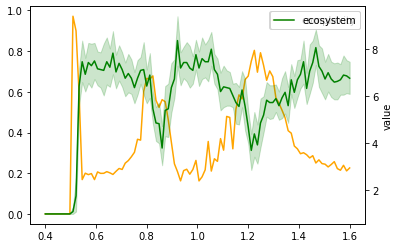

In [200]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plot_y(ecosystem, luminosities, ax2, "ecosystem", "green")
sns.lineplot(x=luminosities, y=complexities['trend'], ax=ax1, color="orange", label="complexity")

<AxesSubplot:xlabel='luminosity', ylabel='value'>

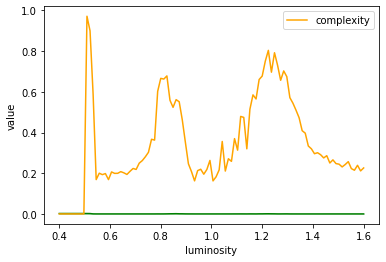

In [205]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plot_y(empties, luminosities, ax2, color="green")
sns.lineplot(x=luminosities, y=complexities['trend'], ax=ax1, color="orange", label="complexity")

<AxesSubplot:>

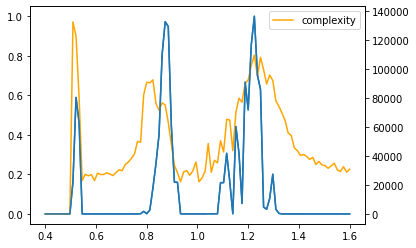

In [218]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
y0 = np.var(empties, axis=1)
y = y0/max(y0)
sns.lineplot(x=luminosities, y=y, ax=ax1)
sns.lineplot(x=luminosities, y=y0, ax=ax2)
sns.lineplot(x=luminosities, y=complexities['trend'], ax=ax1, color="orange", label="complexity")

In [194]:
blacks = []
whites = []
for e in experiments.values():
    bl = []
    wh = []
    for w in e.worlds:
        bc = 0
        wc = 0
        for k, v in w.counts.items():
            if k == "empty":
                pass
            elif k.split(">")[0] == "black":
                bc += v
            else:
                
                wc += v
                
        bl.append(bc)
        wh.append(wc)
    blacks.append(bl)
    whites.append(wh)

In [195]:
variance = np.var(whites, axis=1) + np.var(blacks, axis=1) + np.var(empties, axis=1)

ValueError: arrays must all be same length

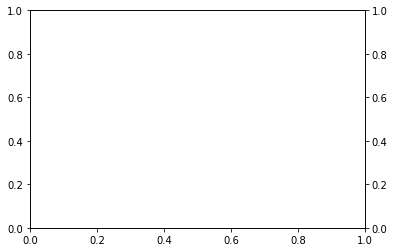

In [208]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.lineplot(x=luminosities, y=variance, ax=ax2)
sns.lineplot(x=luminosities, y=complexities['trend'], ax=ax1, color="orange", label="complexity")

In [198]:
complexities = {'mean': [], 'trend':[], 'max': []}
empties = []
temperature = []
ecosystem = []
more_experiments = {}

luminosities = np.linspace(0.4, 1.6, 100)
ensembles = 30
distance = 200
mutation_rate = 0.002


for lum in luminosities:
    worlds = []
    for w in range(ensembles):
        worlds.append(DaisyWorld({
        'white': {'albedo': 0.75, 'initial': 0.3},
        'black': {'albedo': 0.25, 'initial': 0.3},
        }, luminosity=lum, mutate_p=mutation_rate, store=False))
    analysis = DaisyWorldAnalysis(worlds, nbsetup.cp)
    analysis.simulate(distance)
    analysis.analyse()
    
    # save all analyses
    more_experiments[lum] = analysis
    
    # complexity
    complexities['mean'].append(analysis.complexity_mean)
    complexities['trend'].append(analysis.complexity_trend)
    complexities['max'].append(analysis.complexity_max)
    
    # alts
    temp_temp = []
    empties_temp = []
    ecosystem_temp = []
    for w in worlds:
        temp_temp.append(w.temperature)
        empties_temp.append(w.counts['empty'])
        ecosystem_temp.append(np.count_nonzero(list(w.counts.values())))
    
    temperature.append(temp_temp)
    empties.append(empties_temp)
    ecosystem.append(ecosystem_temp)

Analysing
